In [ ]:
import os
import glob
import numpy as np
from utils import read_data, parse_xdf, get_event_names
import mne
import matplotlib.pyplot as plt
plt.style.use('default')


In [ ]:
exp_path = os.path.join("exp_data","02_Experimental")
control_path = os.path.join("exp_data","01_Control")
glob_pattern = os.path.join("**","*.xdf")

exp_files = glob.glob(os.path.join(exp_path,glob_pattern),recursive=True)
control_files = glob.glob(os.path.join(control_path,glob_pattern),recursive=True)
# CTRL03-sub-129059-old error

In [56]:
def calculate_power_spectrum(epoch, event_name='ast_stim-control-waves_crashing_on_rock_beach',
                             fmin=1, fmax=20, compute_method='wavelet'):
    """Calculate power spectrum for given epochs."""
    # psd, freqs = mne.time_frequency.psd_welch(epochs, fmin=fmin, fmax=fmax)
    if compute_method == 'wavelet':
        freqs = np.logspace(*np.log10([fmin, fmax]), num=8)
        n_cycles = freqs / 2.0  # different number of cycle per frequency
        power, itc = epoch[event_name].compute_tfr(
            method="morlet",
            freqs=freqs,
            n_cycles=n_cycles,
            average=True,
            return_itc=True,
            decim=3,
        )
    return power


def compute_band_ratios(power):
    # Define frequency bands (Hz)
    bands = {
        'delta': (1, 4),
        'theta': (4, 8),
        'alpha': (8, 13),
        'beta': (13, 30),
    }

    # Get frequency indices for each band
    band_indices = {
        band: np.where((power.freqs >= low) & (power.freqs < high))[0]
        for band, (low, high) in bands.items()
    }

    # Calculate normalized average power per band per channel
    band_power_norm = {}
    for band, idxs in band_indices.items():
        band_power_norm[band] = []
        for ch in range(power.data.shape[0]):
            data = power.data[ch]
            # Normalize the TFR for this channel
            data_norm = (data - data.min()) / (data.max() - data.min() + 1e-12)
            # Average over band freqs and all times
            band_avg = data_norm[idxs, :].mean()
            band_power_norm[band].append(band_avg)
        band_power_norm[band] = np.array(band_power_norm[band])

    return band_power_norm


In [57]:
participant_files = control_files[:6]
event_type = 'ast_stim'
participant_ratios = []
for participant_file in participant_files:
    participant_number = participant_file.split(os.sep)[2]
    participant_id = participant_file.split(os.sep)[-1].split('_')[0]
    print(f"Processing {participant_number} ({participant_id})")
    raw, events, mapping = read_data(participant_file)
    # print(events)
    epoch = mne.Epochs(
        raw, events, event_id=mapping[event_type], tmin=-0.2, tmax=4)
    power = calculate_power_spectrum(
        epoch, event_name='ast_stim-control-waves_crashing_on_rock_beach')
    band_powers = compute_band_ratios(power)

    alpha = band_powers['alpha']
    beta = band_powers['beta']
    alpha_beta_ratio = alpha / (beta + 1e-12)  # Avoid division by zero
    participant_ratios.append({
        'participant_id': f"{participant_number}",
        'alpha_beta_ratio': alpha_beta_ratio.mean(),
    })

Processing CTRL08 (sub-488218)
Creating RawArray with float64 data, n_channels=16, n_times=124155
    Range : 0 ... 124154 =      0.000 ...   993.232 secs
Ready.
Finding segments below or above PTP threshold.
Bad channels: ['L4', 'L5', 'L7', 'R7']
Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 59 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 59.35
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 59.10 Hz)
- Upper passband edge: 60.65 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 60.90 Hz)
- Filter length: 825 samples (6.600 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filt

Stream 4: Calculated effective sampling rate 26.5583 Hz is different from specified rate 30.0000 Hz.
Stream 3: Calculated effective sampling rate 0.0000 Hz is different from specified rate 50.0000 Hz.


Creating RawArray with float64 data, n_channels=16, n_times=150635
    Range : 0 ... 150634 =      0.000 ...  1205.072 secs
Ready.
Finding segments below or above PTP threshold.
Bad channels: ['R1', 'R2', 'R4', 'R5', 'R7', 'R8', 'R9', 'R10']
Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 59 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 59.35
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 59.10 Hz)
- Upper passband edge: 60.65 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 60.90 Hz)
- Filter length: 825 samples (6.600 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- 

Stream 3: Calculated effective sampling rate 0.0000 Hz is different from specified rate 30.0000 Hz.


Creating RawArray with float64 data, n_channels=16, n_times=158885
    Range : 0 ... 158884 =      0.000 ...  1271.072 secs
Ready.
Finding segments below or above PTP threshold.
Bad channels: ['L4', 'L7']
Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 59 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 59.35
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 59.10 Hz)
- Upper passband edge: 60.65 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 60.90 Hz)
- Filter length: 825 samples (6.600 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) 

Stream 2: Calculated effective sampling rate 0.0000 Hz is different from specified rate 50.0000 Hz.


Creating RawArray with float64 data, n_channels=16, n_times=133470
    Range : 0 ... 133469 =      0.000 ...  1067.752 secs
Ready.
Finding segments below or above PTP threshold.
Bad channels: ['R1', 'R2', 'R4', 'R5', 'R7', 'R8', 'R9', 'R10']
Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 59 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 59.35
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 59.10 Hz)
- Upper passband edge: 60.65 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 60.90 Hz)
- Filter length: 825 samples (6.600 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- 

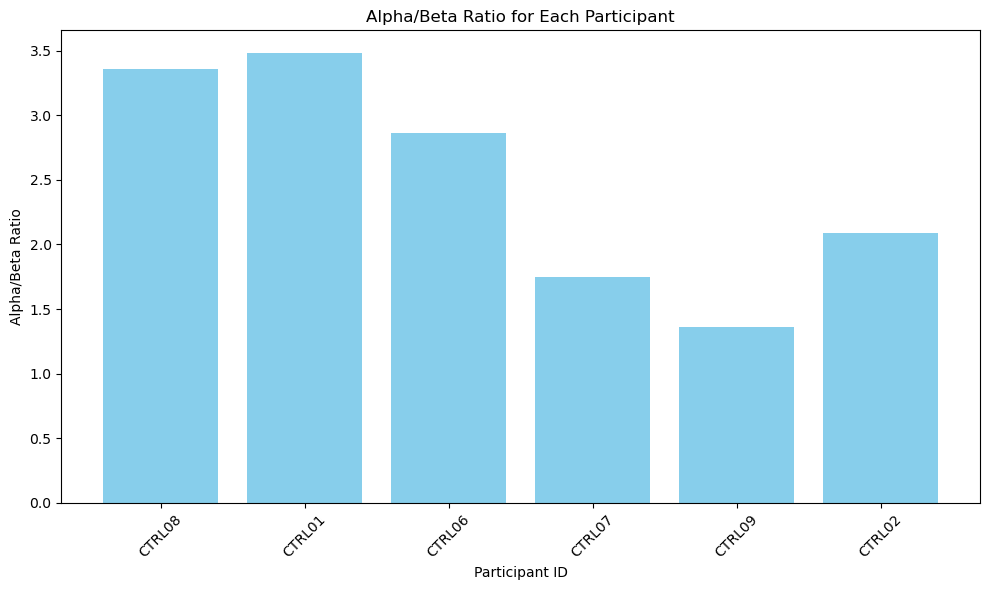

In [58]:
# plot the ratios
import matplotlib.pyplot as plt
participant_ids = [r['participant_id'] for r in participant_ratios]
ratios = [r['alpha_beta_ratio'] for r in participant_ratios]
plt.figure(figsize=(10, 6))
plt.bar(participant_ids, ratios, color='skyblue')
plt.xlabel('Participant ID')
plt.ylabel('Alpha/Beta Ratio')
plt.title('Alpha/Beta Ratio for Each Participant')
plt.xticks(rotation=45)
plt.tight_layout()

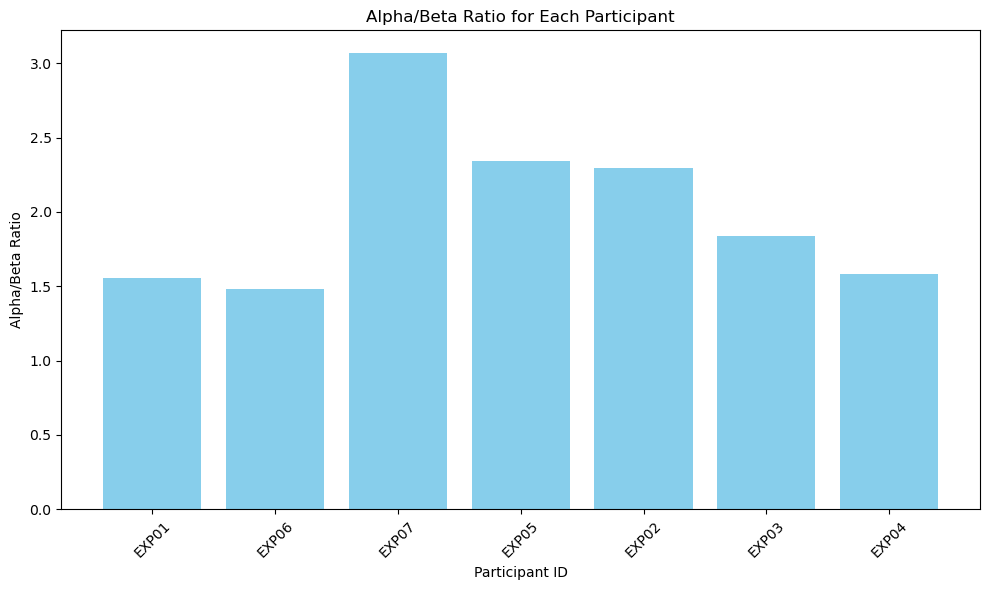

In [ ]:
# plot the ratios
import matplotlib.pyplot as plt
participant_ids = [r['participant_id'] for r in participant_ratios]
ratios = [r['alpha_beta_ratio'] for r in participant_ratios]
plt.figure(figsize=(10, 6))
plt.bar(participant_ids, ratios, color='skyblue')
plt.xlabel('Participant ID')
plt.ylabel('Alpha/Beta Ratio')
plt.title('Alpha/Beta Ratio for Each Participant')
plt.xticks(rotation=45)
plt.tight_layout()